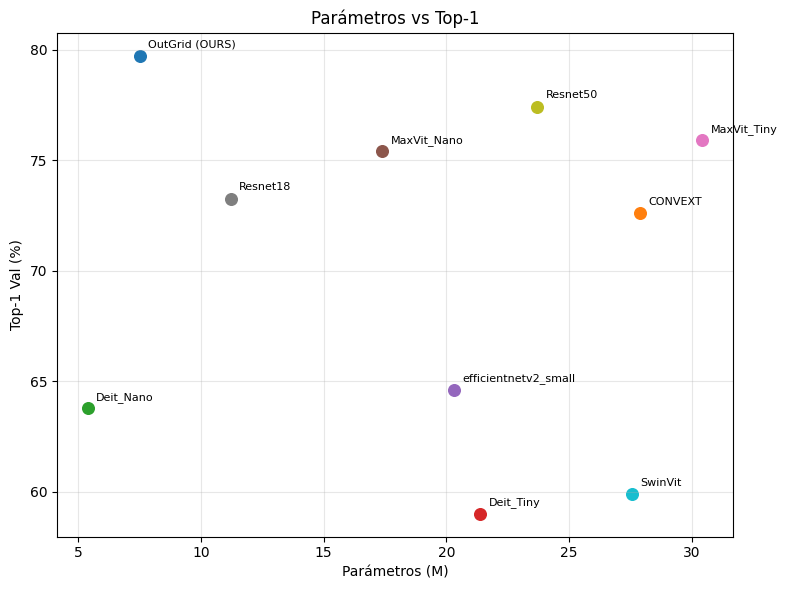

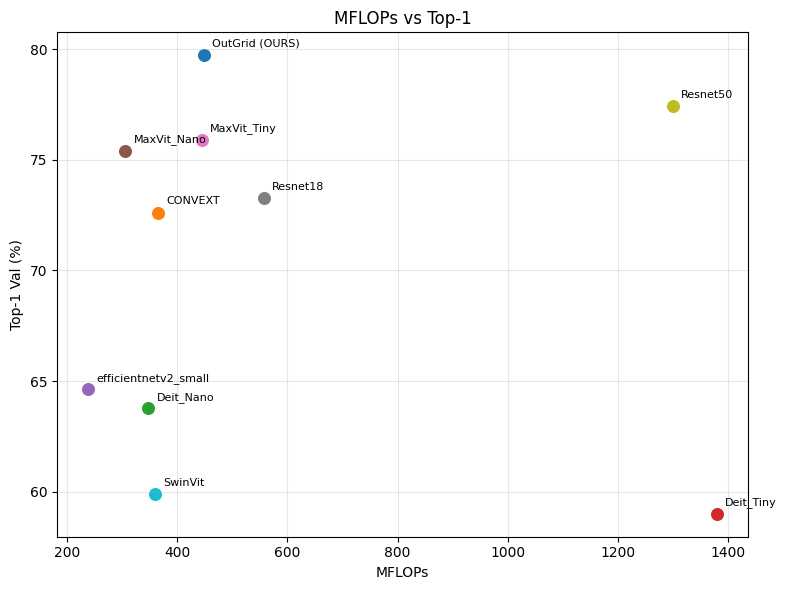

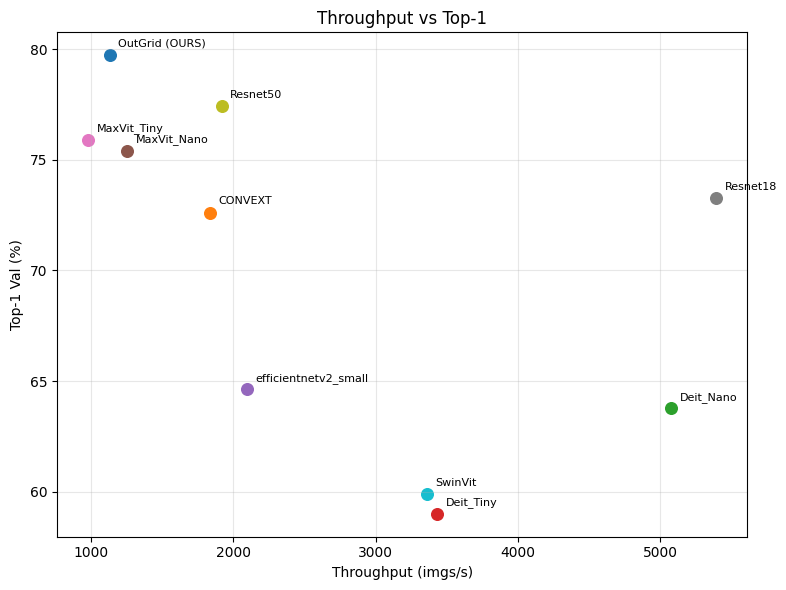

: 

In [ ]:
import re
import matplotlib.pyplot as plt

log_path = r"C:\Users\alejo\OneDrive\Escritorio\Profesional\Modelaje\Modelos de DL\outlook-grid-vision-transformer\logs\Logs Models Comparisons Cifrar100 100epocs.txt"

header_re = re.compile(r"^-{5,}\s*(.+?)\s*-{5,}$")
top1_re = re.compile(r"top1:\s*([0-9.]+)")
params_re = re.compile(r"model:\s*params=([\d,]+)")
mflops_re = re.compile(r"Compute \(per forward\):\s*([0-9.]+)\s*(M|G)FLOPs")
throughput_re = re.compile(r"throughput:\s*([0-9.]+)\s*imgs/s")


models = []
current = None

with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()

        m_header = header_re.match(line)
        if m_header:
            if current and {"top1", "params", "mflops"} <= current.keys():
                models.append(current)
            current = {"model": m_header.group(1).strip()}
            continue

        if not current:
            continue

        m_top1 = top1_re.search(line)
        if m_top1:
            current["top1"] = float(m_top1.group(1))

        m_params = params_re.search(line)
        if m_params:
            current["params"] = int(m_params.group(1).replace(",", ""))

        m_mflops = mflops_re.search(line)
        if m_mflops:
            val = float(m_mflops.group(1))
            unit = m_mflops.group(2)
            current["mflops"] = val * 1000.0 if unit == "G" else val

        m_thr = throughput_re.search(line)
        if m_thr:
            current["throughput"] = float(m_thr.group(1))


if current and {"top1", "params", "mflops"} <= current.keys():
    models.append(current)

models = [m for m in models if {"top1", "params", "mflops"} <= m.keys()]

# --- Plot 1: Params vs Top1 ---
plt.figure(figsize=(8, 6))
for m in models:
    x = m["params"] / 1e6  # en millones
    y = m["top1"]
    plt.scatter(x, y, s=70)
    plt.annotate(m["model"], (x, y), textcoords="offset points", xytext=(6, 6), fontsize=8)

plt.xlabel("Parámetros (M)")
plt.ylabel("Top-1 Val (%)")
plt.title("Parámetros vs Top-1")
plt.grid(alpha=0.3)
plt.tight_layout()

# --- Plot 2: MFLOPs vs Top1 ---
plt.figure(figsize=(8, 6))
for m in models:
    x = m["mflops"]
    y = m["top1"]
    plt.scatter(x, y, s=70)
    plt.annotate(m["model"], (x, y), textcoords="offset points", xytext=(6, 6), fontsize=8)

plt.xlabel("MFLOPs")
plt.ylabel("Top-1 Val (%)")
plt.title("MFLOPs vs Top-1")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


# --- Plot 3: Throughput vs Top1 ---
plt.figure(figsize=(8, 6))
for m in models:
    if "throughput" not in m:
        continue
    x = m["throughput"]
    y = m["top1"]
    plt.scatter(x, y, s=70)
    plt.annotate(m["model"], (x, y), textcoords="offset points", xytext=(6, 6), fontsize=8)

plt.xlabel("Throughput (imgs/s)")
plt.ylabel("Top-1 Val (%)")
plt.title("Throughput vs Top-1")
plt.grid(alpha=0.3)
plt.tight_layout()
